In [1]:
!pip install -U tensorflow_hub

Requirement already up-to-date: tensorflow_hub in /usr/local/lib/python3.6/dist-packages (0.5.0)


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf

tf.enable_eager_execution()

In [3]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [4]:
#@param {type:"string"}
#classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/2"

In [5]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    #hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
    hub.KerasLayer("/tf/notebooks/tf_official/images/mobilenet_v2_2", 
                     input_shape=IMAGE_SHAPE+(3,))
])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [6]:
classifier

In [7]:
!pip install pillow

/usr/local/lib/python3.6/dist-packages/PIL/Image.py


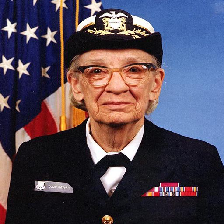

In [8]:
import numpy as np
from PIL import Image
import PIL
print(Image.__file__)
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper


In [9]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [10]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [11]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
print(labels_path)
imagenet_labels = np.array(
                        open(labels_path).read().splitlines())

/root/.keras/datasets/ImageNetLabels.txt


In [13]:
imagenet_labels
imagenet_labels[predicted_class]

'military uniform'

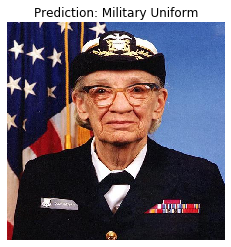

In [14]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)
data_root

In [15]:
data_root= '/tf/notebooks/tf_official/load_data/flower_photos'

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

image_data.image_data_generator

Found 3670 images belonging to 5 classes.


In [16]:
!pip install SciPy

In [17]:

import PIL
PIL.__file__


'/usr/local/lib/python3.6/dist-packages/PIL/__init__.py'

In [18]:
import scipy
print(scipy.__file__)
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break



/usr/local/lib/python3.6/dist-packages/scipy/__init__.py
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [19]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [20]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['hair slide', 'alp', 'greenhouse', 'hair slide', 'daisy',
       'spider web', 'rapeseed', 'guillotine', 'bee', 'brain coral',
       'bee', 'daisy', 'greenhouse', 'cardoon', 'daisy',
       "yellow lady's slipper", 'daisy', 'daisy', 'maze', 'buckeye',
       'coral reef', 'earthstar', 'daisy', 'cardoon', 'picket fence',
       'swab', 'picket fence', 'hip', "yellow lady's slipper", 'ladybug',
       'daisy', 'daisy'], dtype='<U30')

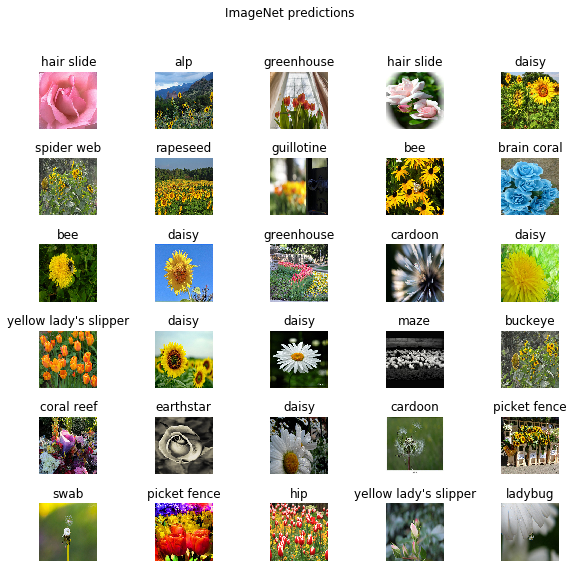

In [21]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
    _ = plt.suptitle("ImageNet predictions")

In [22]:
feature_extractor_path = "/tf/notebooks/tf_official/images/mobilenet_v2_feature_vector_2"

In [23]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_path,
                                        input_shape=(224,224,3))

In [24]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)
